### Which variables will best predict high programming density "in town"?
In this notebook, we aim to understand how different variables influence the density of programmers in a town. This involves studying the relationship between programming density and various factors such as Gross Domestic Product (GDP), population dynamics, and programming level between the years 2008 - 2020

In [298]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
# Opening and reading the file
path = os.path.join("FINAL_no_TR.xlsx")
FINAL_no_TR = pd.read_excel(path)

FINAL_no_TR.head()

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS)
0,2008,Aargau,CH,86,167,0,0,32,CH033,349.067,24942.455371,23931.324019,586.60
1,2009,Aargau,CH,370,2291,4158,265,3282,CH033,349.067,25582.147076,24614.963819,595.84
2,2010,Aargau,CH,1658,4073,12602,474,7459,CH033,349.067,28422.113810,27311.621095,604.17
3,2011,Aargau,CH,1876,6039,16410,2362,13563,CH033,348.695,32557.042431,31336.257699,614.88
4,2012,Aargau,CH,3226,6260,24401,4175,18513,CH033,355.344,33443.246005,32261.320850,622.82


This is the definition of programmers copied from the notebook "Programming Density in Towns" that we will use here.

In [318]:
#Defining number of programmers in each region based on the assumption made

weeks_in_year = 52
months_in_year = 12

#Experts in Region 
FINAL_no_TR["Experts"] = (FINAL_no_TR["answercount"] / (weeks_in_year*2))

#Innovators in Region
FINAL_no_TR["Innovators"] = FINAL_no_TR["questioncount"] / months_in_year

# Late Adopters in Region
FINAL_no_TR["Late_Adopters"] = ((FINAL_no_TR["upvotecount"] +  FINAL_no_TR["downvotecount"] + FINAL_no_TR["commentcount"])/ (months_in_year*15))

#Delete unnecessary columns and sum up all Developers
FINAL_no_TR.drop(columns = ["answercount", "questioncount", "upvotecount", "downvotecount", "commentcount"])
FINAL_no_TR["Programmers_Total"] = FINAL_no_TR["Experts"] + FINAL_no_TR["Innovators"] + FINAL_no_TR["Late_Adopters"] 

FINAL_no_TR['Programming_Density'] = FINAL_no_TR['Programmers_Total'] / (FINAL_no_TR['POP (THS)'] * 1000)
FINAL_no_TR.drop(columns = ["answercount", "questioncount", "upvotecount", "downvotecount", "commentcount"])

FINAL_no_TR['GDP_per_capita'] = FINAL_no_TR['GDP (MIO_EUR)'] / FINAL_no_TR['POP (THS)']

FINAL_no_TR

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Experts,Innovators,Late_Adopters,Programmers_Total,Programming_Density,GDP_per_capita
0,2008,Aargau,CH,86,167,0,0,32,CH033,349.067,24942.455371,23931.324019,586.60,1.605769,7.166667,0.177778,8.950214,0.000015,42.520381
1,2009,Aargau,CH,370,2291,4158,265,3282,CH033,349.067,25582.147076,24614.963819,595.84,22.028846,30.833333,42.805556,95.667735,0.000161,42.934592
2,2010,Aargau,CH,1658,4073,12602,474,7459,CH033,349.067,28422.113810,27311.621095,604.17,39.163462,138.166667,114.083333,291.413462,0.000482,47.043239
3,2011,Aargau,CH,1876,6039,16410,2362,13563,CH033,348.695,32557.042431,31336.257699,614.88,58.067308,156.333333,179.638889,394.039530,0.000641,52.948612
4,2012,Aargau,CH,3226,6260,24401,4175,18513,CH033,355.344,33443.246005,32261.320850,622.82,60.192308,268.833333,261.605556,590.631197,0.000948,53.696487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,2016,Östergötland County,SE,4512,3147,18061,1583,14559,SE123,212.000,18408.070000,16305.800000,449.00,30.259615,376.000000,190.016667,596.276282,0.001328,40.997929
3948,2017,Östergötland County,SE,3633,3263,16235,1506,11172,SE123,217.000,18787.460000,16657.120000,454.99,31.375000,302.750000,160.627778,494.752778,0.001087,41.292028
3949,2018,Östergötland County,SE,3683,2516,19716,1875,14176,SE123,224.000,18855.660000,16710.180000,460.01,24.192308,306.916667,198.705556,529.814530,0.001152,40.989674
3950,2019,Östergötland County,SE,2957,2037,19970,1243,9206,SE123,226.000,18820.580000,16714.730000,464.00,19.586538,246.416667,168.994444,434.997650,0.000937,40.561595


### General Regression Analysis

In [319]:
# Correlation Matrix
correlation_matrix = FINAL_no_TR[['Programming_Density', 'GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'EMP (THS)', 'GDP_per_capita']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Regression Analysis
X = FINAL_no_TR[['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'EMP (THS)', "GDP_per_capita"]]
y = FINAL_no_TR['Programming_Density']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

Correlation Matrix:
                      Programming_Density  GDP (MIO_EUR)  GVA (MIO_EUR)  \
Programming_Density             1.000000       0.368253       0.372544   
GDP (MIO_EUR)                   0.368253       1.000000       0.999606   
GVA (MIO_EUR)                   0.372544       0.999606       1.000000   
EMP (THS)                       0.216421       0.944043       0.943102   
GDP_per_capita                  0.559412       0.397172       0.405333   

                     EMP (THS)  GDP_per_capita  
Programming_Density   0.216421        0.559412  
GDP (MIO_EUR)         0.944043        0.397172  
GVA (MIO_EUR)         0.943102        0.405333  
EMP (THS)             1.000000        0.196905  
GDP_per_capita        0.196905        1.000000  
                             OLS Regression Results                            
Dep. Variable:     Programming_Density   R-squared:                       0.367
Model:                             OLS   Adj. R-squared:                  0.366


All correlation metrics suggest a correlation, but the relationships are not that significant. R-squared suggests that economic metrics have a low influence on programming density. We are getting worried about multicollinearity, which means that GDP and GVA are highly correlated to each other (which makes sense as they are close metrics). Now, let's analyze the top regions vs. other regions. This might give a better overview of how the economic factors influence those regions.

### Country Specific Regression Analysis

In [320]:
# Identify Unique Countries
unique_countries = FINAL_no_TR['country'].unique()

# Regression Analysis for Each Country
country_specific_results = {}

for country in unique_countries:
    country_data = FINAL_no_TR[FINAL_no_TR['country'] == country]

    X = country_data[['GDP (MIO_EUR)','GVA (MIO_EUR)', 'EMP (THS)', 'GDP_per_capita']]
    y = country_data['Programming_Density']
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    country_specific_results[country] = model.summary()
    
country_specific_results

{'CH': <class 'statsmodels.iolib.summary.Summary'>
 """
                              OLS Regression Results                            
 Dep. Variable:     Programming_Density   R-squared:                       0.705
 Model:                             OLS   Adj. R-squared:                  0.701
 Method:                  Least Squares   F-statistic:                     198.7
 Date:                 Wed, 22 Nov 2023   Prob (F-statistic):           7.10e-87
 Time:                         17:49:06   Log-Likelihood:                 2159.1
 No. Observations:                  338   AIC:                            -4308.
 Df Residuals:                      333   BIC:                            -4289.
 Df Model:                            4                                         
 Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------

The influence of economic factors on programming density varies significantly across countries. This suggests the need for country specific strategies or policies.
GDP per capita, GDP, GVA, and EMP have different influences in different countries, indicating that the economic context and structure play a significant role.
Model Fit and Reliability: R-squared values vary, showing better model fit in some countries (FR, CH) than others (ES, IT). We have also wee a warning of multicollinearity across all models suggesting that we need to be careful in interpreting the results and possibly revising the model to address these issues.

In [321]:
# Calculating Correlation between Programming Density and GDP per Capita
correlation_gdp_per_capita = FINAL_no_TR[['Programming_Density', 'GDP_per_capita']].corr().iloc[0, 1]
print("Correlation between Programming Density and GDP per Capita:", correlation_gdp_per_capita)

Correlation between Programming Density and GDP per Capita: 0.5594122314858477


### Top regions vs other regions analysis

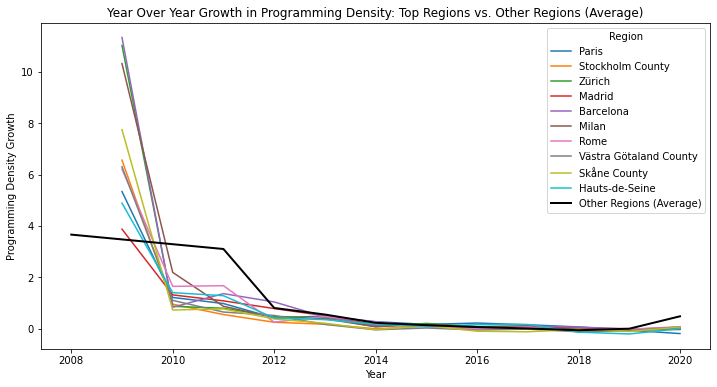

In [322]:
# Calculate Growth in Programming Density for both top regions and other regions
FINAL_no_TR['Programming_Density_Growth'] = FINAL_no_TR.groupby('nuts3_name')['Programming_Density'].pct_change()

# Extracting data for the top regions
top_regions_growth_data = FINAL_no_TR[FINAL_no_TR['nuts3_name'].isin(top_regions_list)]

# Calculating the average programming density growth per year for other regions
average_growth_other = FINAL_no_TR[~FINAL_no_TR['nuts3_name'].isin(top_regions_list)].groupby('year')['Programming_Density_Growth'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for top regions growth
for region in top_regions_list:
    region_growth_data = top_regions_growth_data[top_regions_growth_data['nuts3_name'] == region]
    sns.lineplot(data=region_growth_data, x='year', y='Programming_Density_Growth', label=region, legend=False)

# Plot for average growth of other regions
sns.lineplot(data=average_growth_other, x='year', y='Programming_Density_Growth', label='Other Regions (Average)', color='black', linewidth=2)

plt.title('Year Over Year Growth in Programming Density: Top Regions vs. Other Regions (Average)')
plt.xlabel('Year')
plt.ylabel('Programming Density Growth')
plt.legend(title='Region', loc='upper right')
plt.show()

This chart shows changes in growth for many regions around the same early years, which then stabilizes. The black line representing the average of other regions remains relatively flat compared to the top regions, which suggests that while the top regions have experienced significant fluctuations and growth in programming density, the other regions have not seen such dramatic changes. The steep initial growth followed by stabilization indicates that there might have been a surge in programming interest or industry growth during those years which then matured.

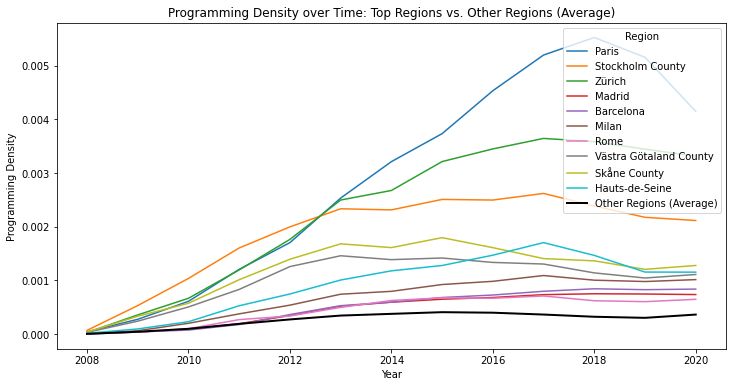

In [323]:
# Your existing code to calculate average_density_other
average_density_other = FINAL_no_TR[~FINAL_no_TR['nuts3_name'].isin(top_regions_list)].groupby('year')['Programming_Density'].mean().reset_index()

# Start plotting
plt.figure(figsize=(12, 6))

# Plot for each top region
for region in top_regions_list:
    region_data = top_regions_data[top_regions_data['nuts3_name'] == region]
    sns.lineplot(data=region_data, x='year', y='Programming_Density', label=region)

# Plot for average of other regions
sns.lineplot(data=average_density_other, x='year', y='Programming_Density', label='Other Regions (Average)', color='black', linewidth=2)

# Setting the title and labels
plt.title('Programming Density over Time: Top Regions vs. Other Regions (Average)')
plt.xlabel('Year')
plt.ylabel('Programming Density')
plt.legend(title='Region', loc='upper right')

# Display the plot
plt.show()

We see a steady increase in programming density for the top regions, with Paris and Stockholm County leading with the highest density towards the latest years observed. The other regions show a much flatter trend over time, which might imply that these regions have a slower growth in programming activity compared to the top regions.

In [324]:
# Convert top_regions to a DataFrame if it's not already
top_regions_df = pd.DataFrame(top_regions)

# Identify common regions
common_regions = set(top_regions_df.index).intersection(set(top_growing_regions.index))

# Unique to top_regions
unique_top_regions = set(top_regions_df.index) - set(top_growing_regions.index)

# Unique to top_growing_regions
unique_growing_regions = set(top_growing_regions.index) - set(top_regions_df.index)

# Print the results
print("Common Regions:", common_regions)
print("Unique to Top Regions:", unique_top_regions)
print("Unique to Top Growing Regions:", unique_growing_regions)

Common Regions: set()
Unique to Top Regions: {'Zürich', 'Paris', 'Stockholm County', 'Barcelona', 'Hauts-de-Seine', 'Skåne County', 'Milan', 'Västra Götaland County', 'Rome', 'Madrid'}
Unique to Top Growing Regions: {'Gorizia', 'Vibo Valentia', 'Hautes-Pyrénées', 'Reggio di Calabria', 'Isernia', 'Jura (CH)', 'Benevento', 'Imperia', 'Rieti', 'Siracusa'}


Top Regions are established hubs with a high current density of programmers. They may have a mature tech ecosystem with higher GDP and education. 

Top Growing Regions are witnessing a significant growth in programming interest. It would be due to government incentives, the tech sector, or education.

No common regions

Common Regions between Top and Top Growing Regions: set()
Unique to Top Regions: {'Zürich', 'Paris', 'Stockholm County', 'Barcelona', 'Hauts-de-Seine', 'Skåne County', 'Milan', 'Västra Götaland County', 'Rome', 'Madrid'}
Unique to Top Growing Regions: {'Gorizia', 'Vibo Valentia', 'Hautes-Pyrénées', 'Reggio di Calabria', 'Isernia', 'Jura (CH)', 'Benevento', 'Imperia', 'Rieti', 'Siracusa'}


<Figure size 1080x720 with 0 Axes>

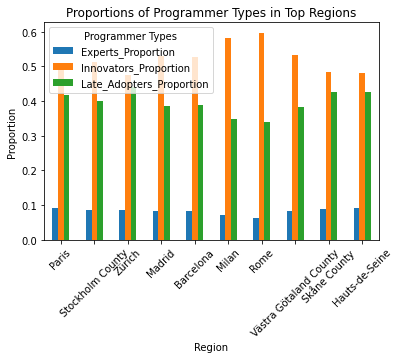

<Figure size 1080x720 with 0 Axes>

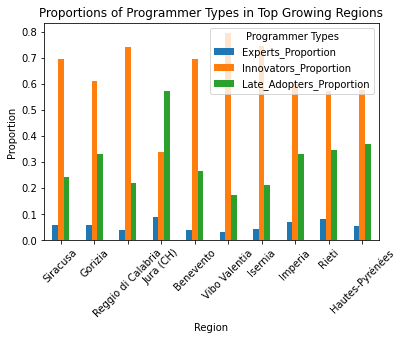

In [325]:
# Identifying Common and Unique Regions
common_regions = set(top_regions.index).intersection(set(top_growing_regions.index))
unique_to_top_regions = set(top_regions.index) - set(top_growing_regions.index)
unique_to_top_growing_regions = set(top_growing_regions.index) - set(top_regions.index)

# Displaying the Identified Regions
print("Common Regions between Top and Top Growing Regions:", common_regions)
print("Unique to Top Regions:", unique_to_top_regions)
print("Unique to Top Growing Regions:", unique_to_top_growing_regions)

# Function to Calculate Proportions (Updated to Avoid Redefinition)
def calculate_proportions(region_name):
    region_data = FINAL_no_TR[FINAL_no_TR['nuts3_name'] == region_name]
    total_programmers = region_data['Programmers_Total'].sum()
    experts_proportion = region_data['Experts'].sum() / total_programmers if total_programmers else 0
    innovators_proportion = region_data['Innovators'].sum() / total_programmers if total_programmers else 0
    late_adopters_proportion = region_data['Late_Adopters'].sum() / total_programmers if total_programmers else 0
    
    return {
        'Experts_Proportion': experts_proportion,
        'Innovators_Proportion': innovators_proportion,
        'Late_Adopters_Proportion': late_adopters_proportion
    }

# Calculating Proportions for Top and Top Growing Regions
top_regions_proportions = {region: calculate_proportions(region) for region in top_regions.index}
top_growing_regions_proportions = {region: calculate_proportions(region) for region in top_growing_regions.index}

# Convert to DataFrames for Plotting
df_top_regions = pd.DataFrame.from_dict(top_regions_proportions, orient='index')
df_top_growing_regions = pd.DataFrame.from_dict(top_growing_regions_proportions, orient='index')

# Plotting
plt.figure(figsize=(15, 10))
df_top_regions.plot(kind='bar', stacked=False)
plt.title('Proportions of Programmer Types in Top Regions')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Programmer Types')
plt.show()

plt.figure(figsize=(15, 10))
df_top_growing_regions.plot(kind='bar', stacked=False)
plt.title('Proportions of Programmer Types in Top Growing Regions')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Programmer Types')
plt.show()


The findings from the bar chart gives us insights into the programming communities in the top and growing regions: 
- The high contribution of Innovators in the Top Growing Regions may suggest that those regions might be experiencing the growth in programming interest 
- The high contribution of Experts in the Top Regions indicates mature community hubs that also might have better job opportunities, tech hubs, and higher programmingn and education. 

In [326]:
# Extract Programming Density for Top Regions
top_regions_density = FINAL_no_TR[FINAL_no_TR['nuts3_name'].isin(top_regions.index)].groupby('nuts3_name')['Programming_Density'].mean()

# Extract Programming Density for Top Growing Regions
top_growing_regions_density = FINAL_no_TR[FINAL_no_TR['nuts3_name'].isin(top_growing_regions.index)].groupby('nuts3_name')['Programming_Density'].mean()

# Combine the density data with the proportions data
df_top_regions['Programming_Density'] = df_top_regions.index.map(top_regions_density)
df_top_growing_regions['Programming_Density'] = df_top_growing_regions.index.map(top_growing_regions_density)

# Correlate Innovators Proportion with Programming Density for Top Regions
top_regions_correlation = df_top_regions[['Innovators_Proportion', 'Programming_Density']].corr().iloc[0, 1]

# Correlate Innovators Proportion with Programming Density for Top Growing Regions
top_growing_regions_correlation = df_top_growing_regions[['Innovators_Proportion', 'Programming_Density', 'Experts_Proportion']].corr().iloc[0, 1]

# Display the results
print("Correlation in Top Regions:", top_regions_correlation)
print("Correlation in Top Growing Regions:", top_growing_regions_correlation)

Correlation in Top Regions: -0.6094679030211207
Correlation in Top Growing Regions: -0.8144178324424639


## Predictive Variables based on economic factors and programming communities:
- Economic factors (GDP, GVA, employment, GDP per Capita) are significant predictors but their influence varies by country/region.
- Communities of programmers such as Experts, Innovators, and Late Adopters are also good predictive variables. Top-growing regions tend to have a higher proportion of Innovators, suggesting these areas might be experiencing growth in programming interest and technological adoption. In contrast, top regions have more Experts, indicating more established and mature programming communities.
- Country specific regression models revealed that the impact of economic variables on programming density varies significantly across different countries. This indicates that local economic conditions and possibly cultural factors play a crucial role in determining programming density.